In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
data=pd.read_csv("perrin-freres-monthly-champagne.csv")

In [3]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
data.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'},inplace=True)

In [5]:
data

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   106 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [7]:
data.isnull().sum()

Month    1
Sales    2
dtype: int64

In [8]:
data=data.dropna()

In [9]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [10]:
data['Month']=pd.to_datetime(data['Month'])

C:\Users\Yash mishra\AppData\Local\Temp\ipykernel_1132\3955737915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']=pd.to_datetime(data['Month'])


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [12]:
data=data.set_index('Month')

In [13]:
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [14]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


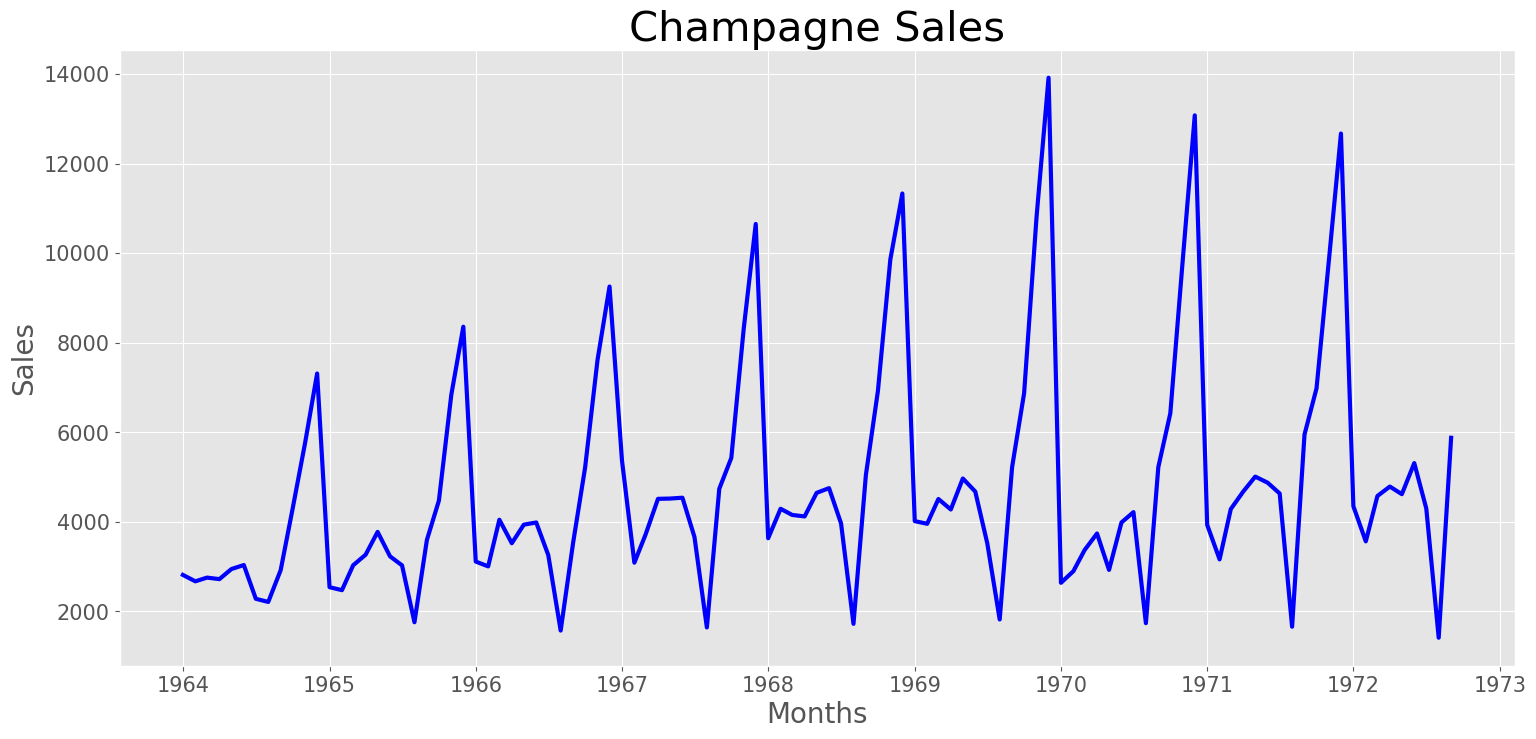

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Months', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Sales', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(data['Sales'], linewidth = 3, color = 'blue')
plt.title('Champagne Sales', fontsize = 30)
plt.show()

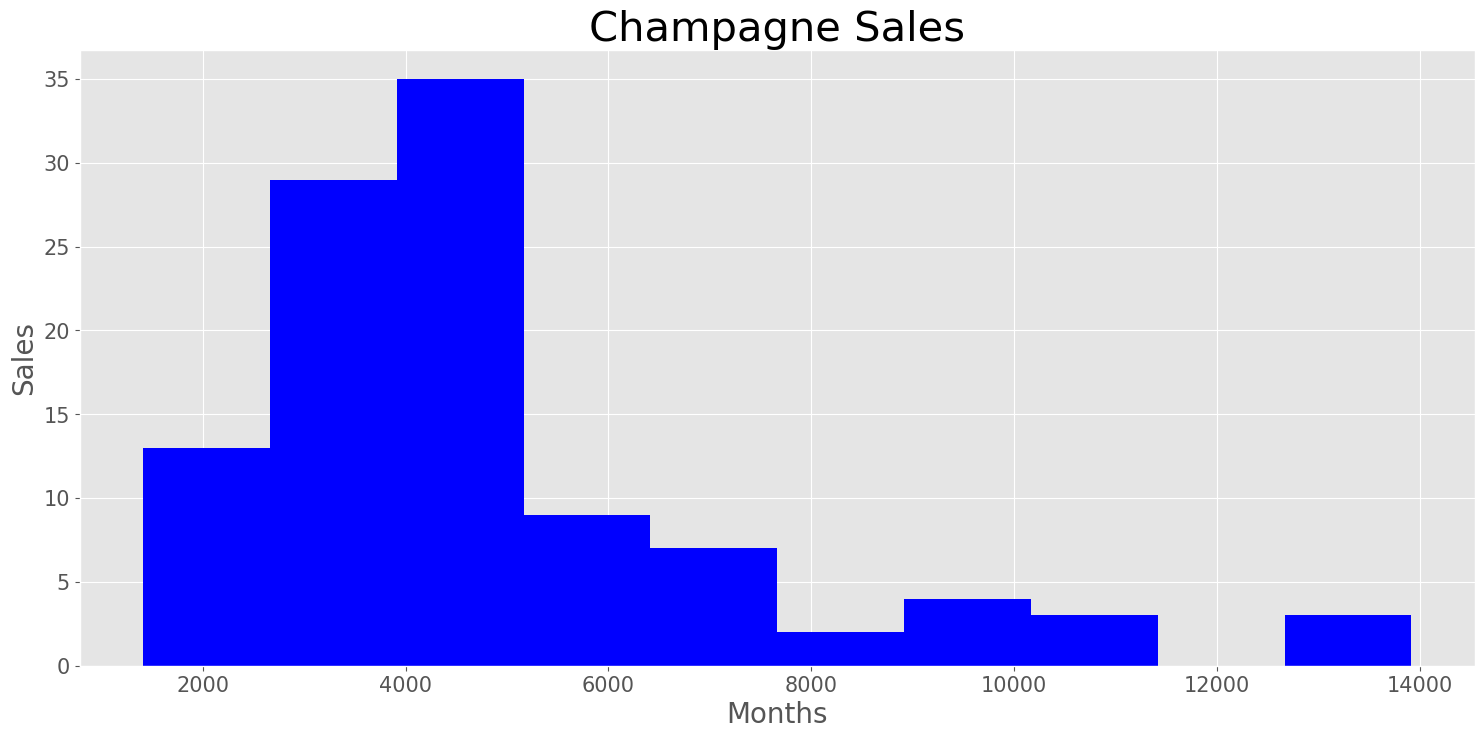

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Months', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Sales', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(data['Sales'], linewidth = 3, color = 'blue')
plt.title('Champagne Sales', fontsize = 30)
plt.show()

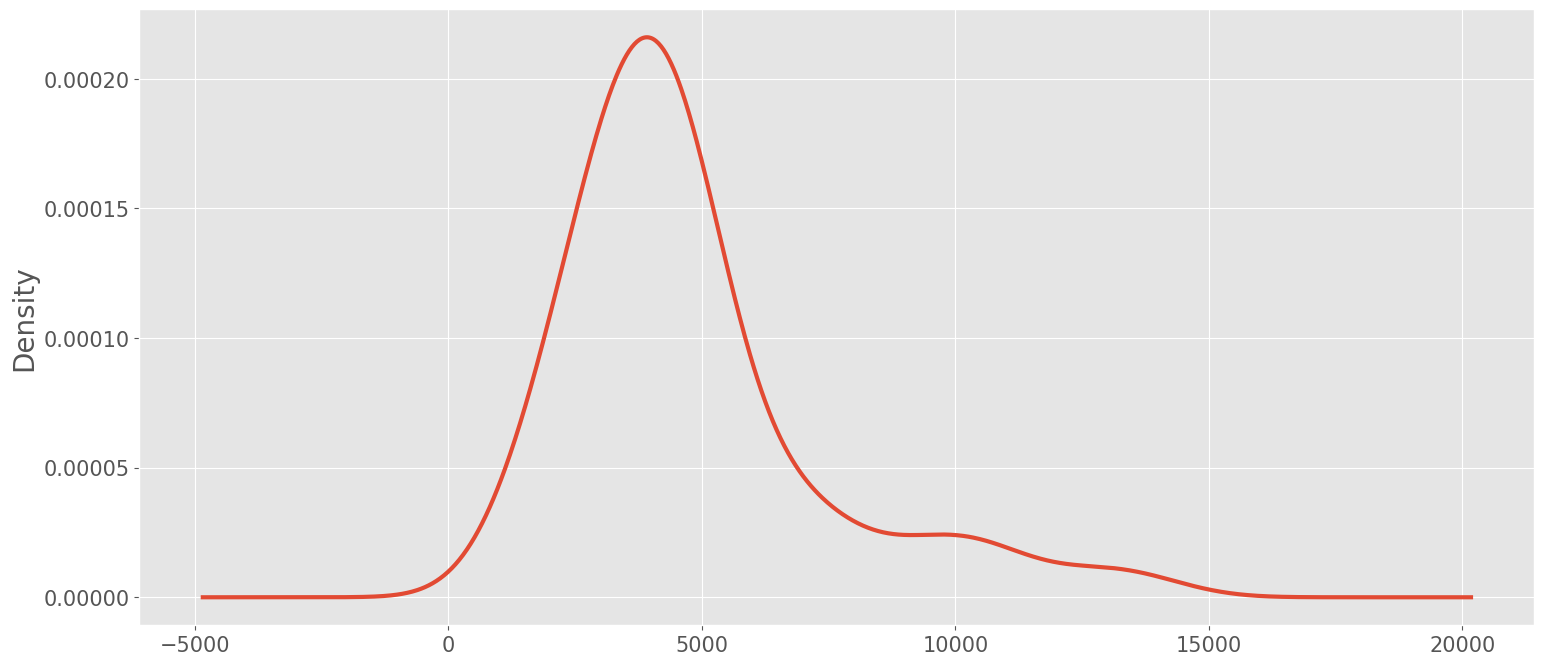

In [17]:
df = data['Sales']
df.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [18]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller

In [19]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(5).mean() # rolling mean
    rolstd = timeseries.rolling(5).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

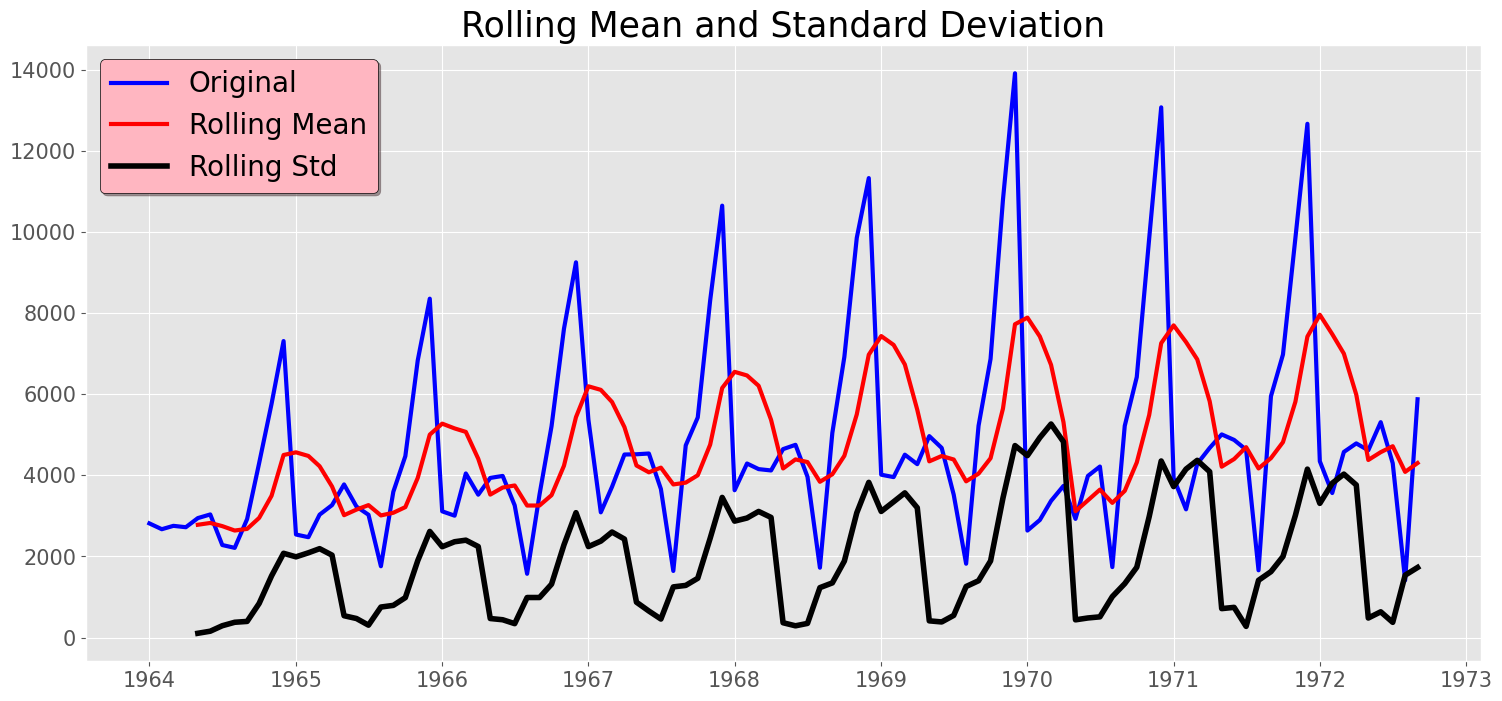

Results of dickey fuller test
Test Statistics                -1.833593
p-value                         0.363916
No. of lags used               11.000000
Number of observations used    93.000000
critical value (1%)            -3.502705
critical value (5%)            -2.893158
critical value (10%)           -2.583637
dtype: float64


In [20]:
test_stationarity(data.Sales)

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data[["Sales"]],period=12,model="multiplicative")


<Figure size 2000x1000 with 0 Axes>

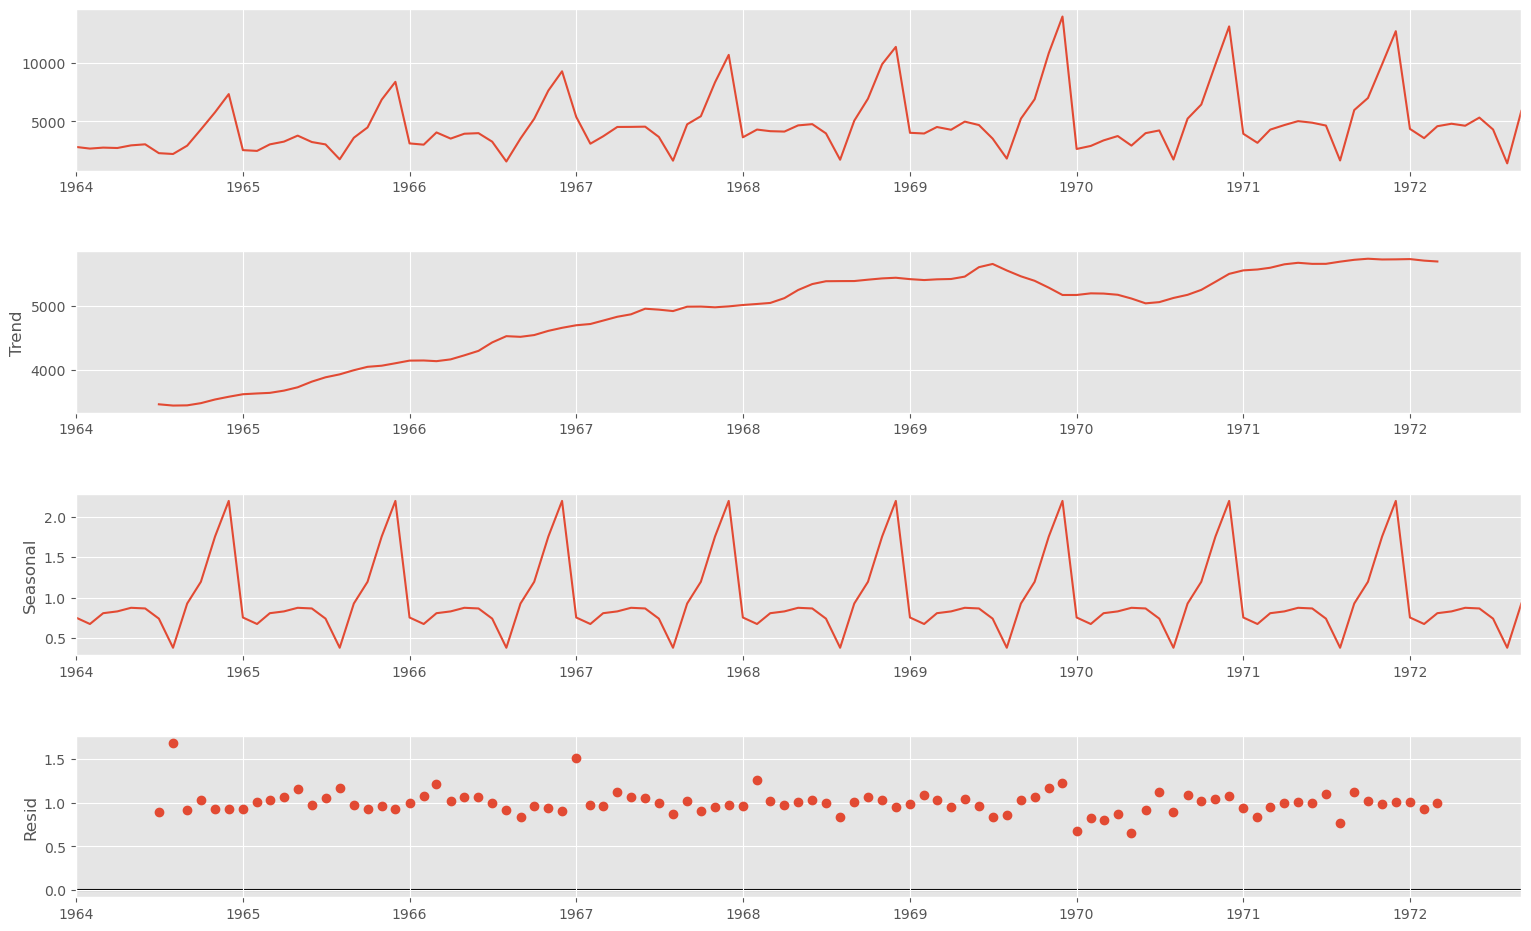

In [22]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: >

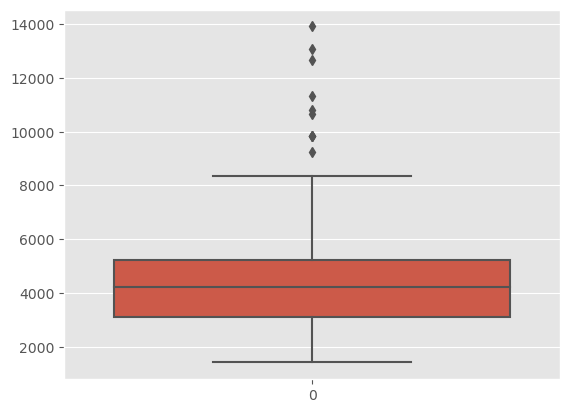

In [23]:
import seaborn as sns
sns.boxplot(data.Sales)

In [24]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = (data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)
cleaned_data = data[~outliers]

In [25]:
cleaned_data

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


<Axes: >

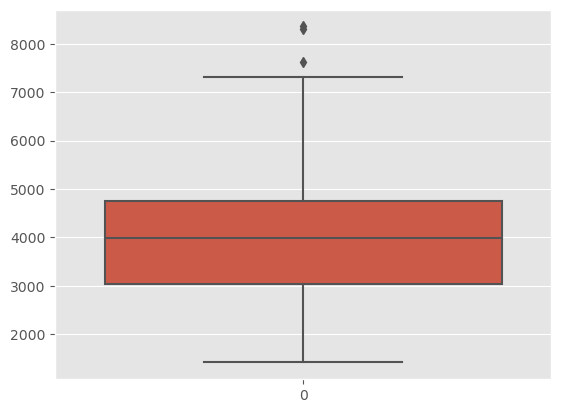

In [26]:
import seaborn as sns
sns.boxplot(cleaned_data.Sales)

In [27]:
data['diff1']=data['Sales'].diff()
data['diff12']=data['Sales'].diff(12)

In [28]:
data.head(15)

,Sales,diff1,diff12
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


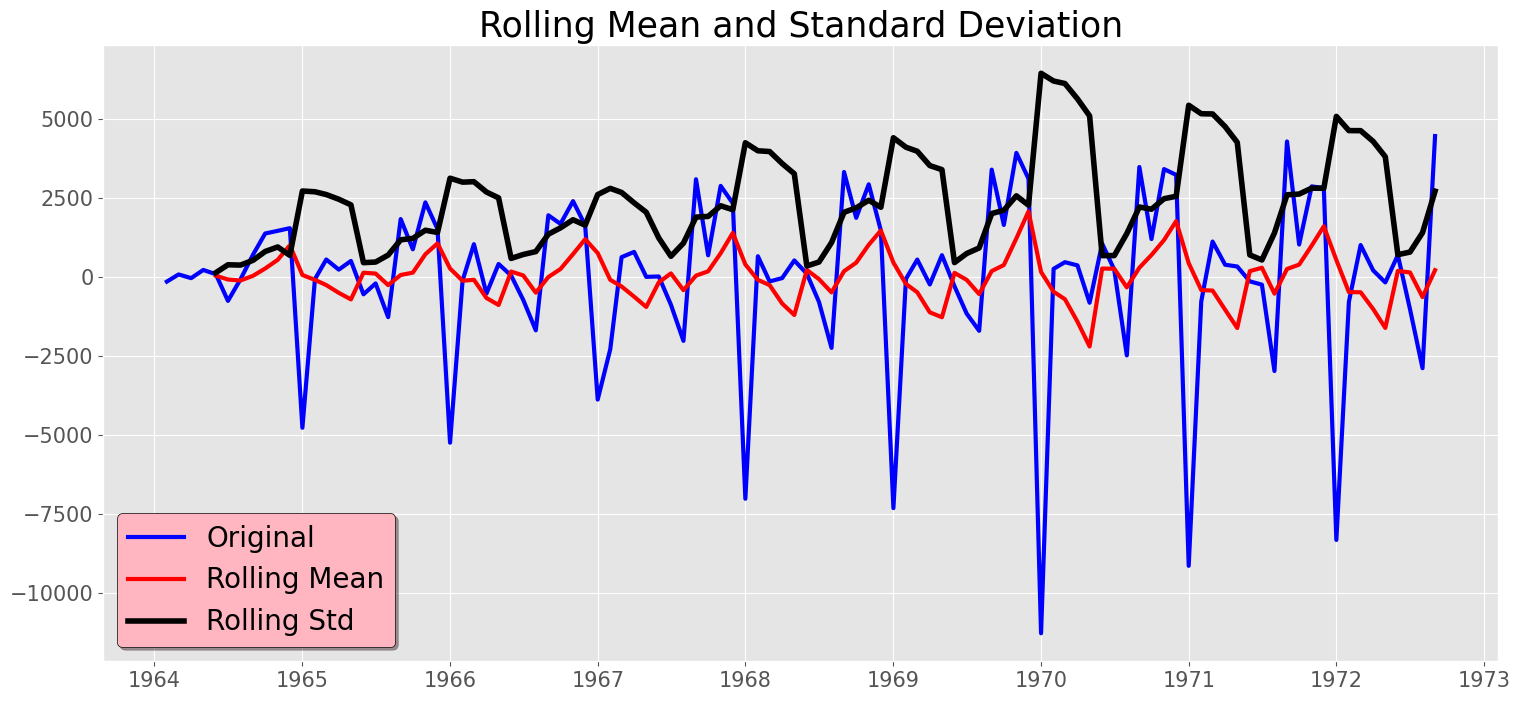

Results of dickey fuller test
Test Statistics               -7.189896e+00
p-value                        2.519620e-10
No. of lags used               1.100000e+01
Number of observations used    9.200000e+01
critical value (1%)           -3.503515e+00
critical value (5%)           -2.893508e+00
critical value (10%)          -2.583824e+00
dtype: float64


In [29]:
test_stationarity(data['diff1'].dropna())

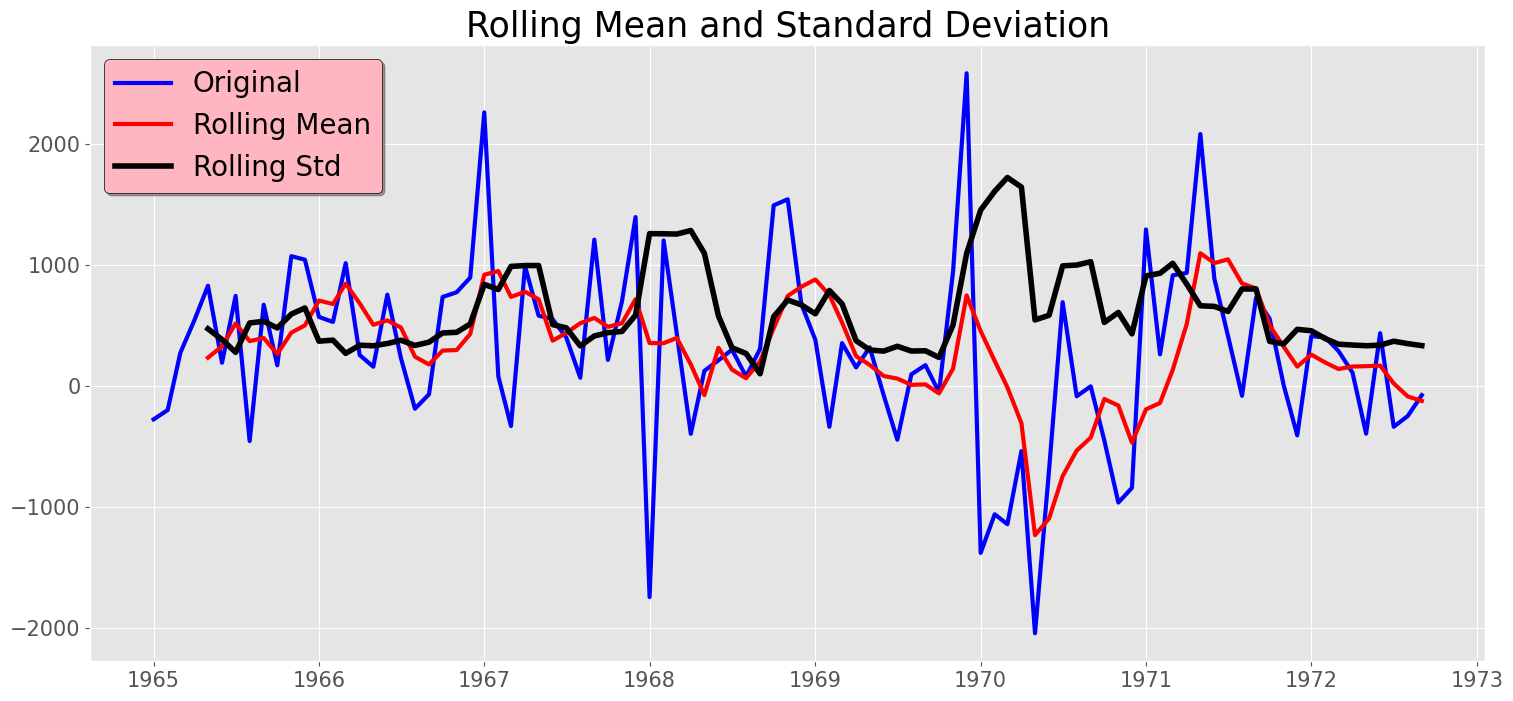

Results of dickey fuller test
Test Statistics               -7.626619e+00
p-value                        2.060580e-11
No. of lags used               0.000000e+00
Number of observations used    9.200000e+01
critical value (1%)           -3.503515e+00
critical value (5%)           -2.893508e+00
critical value (10%)          -2.583824e+00
dtype: float64


In [30]:
test_stationarity(data['diff12'].dropna())

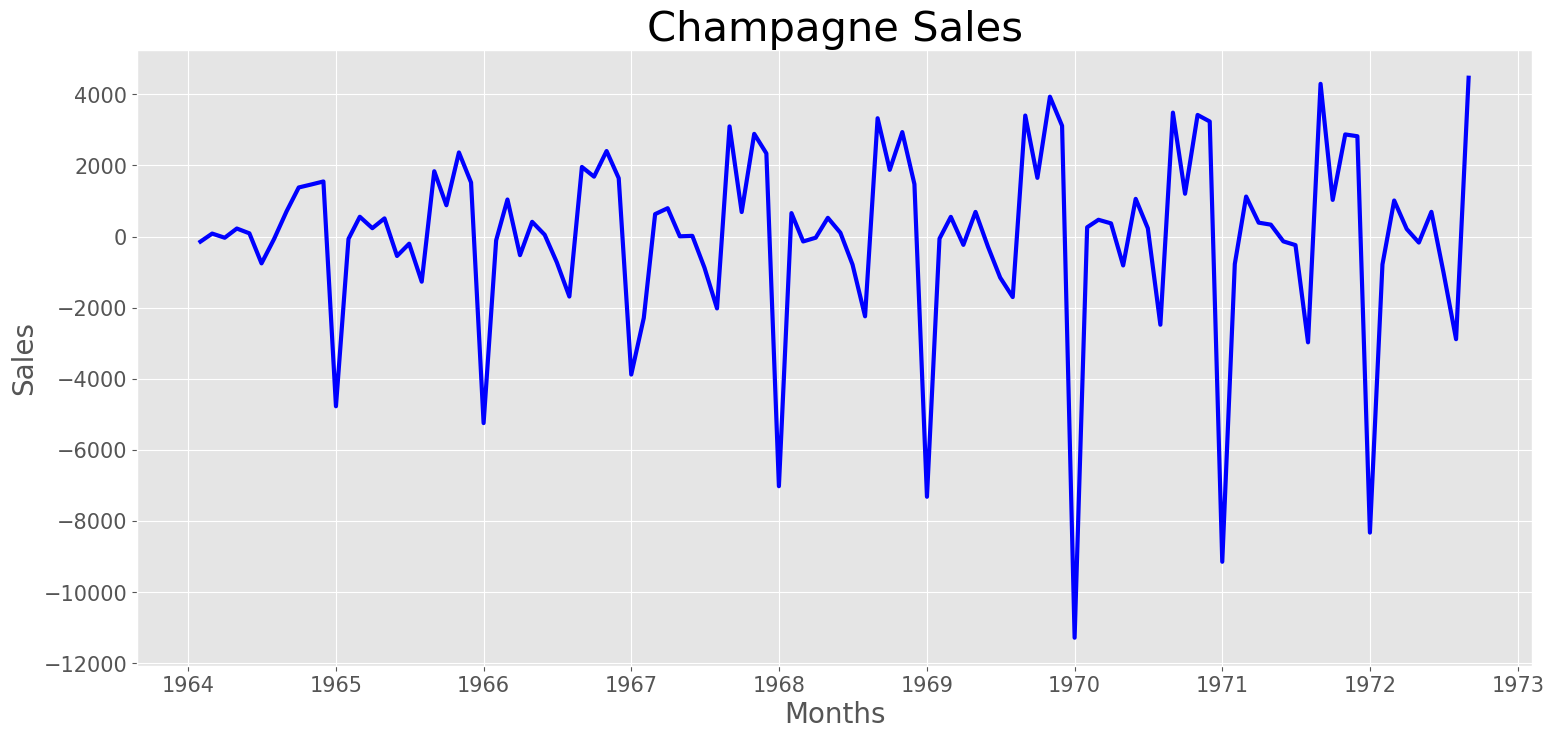

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Months', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Sales', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(data['diff1'], linewidth = 3, color = 'blue')
plt.title('Champagne Sales', fontsize = 30)
plt.show()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

D:\anaconda\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


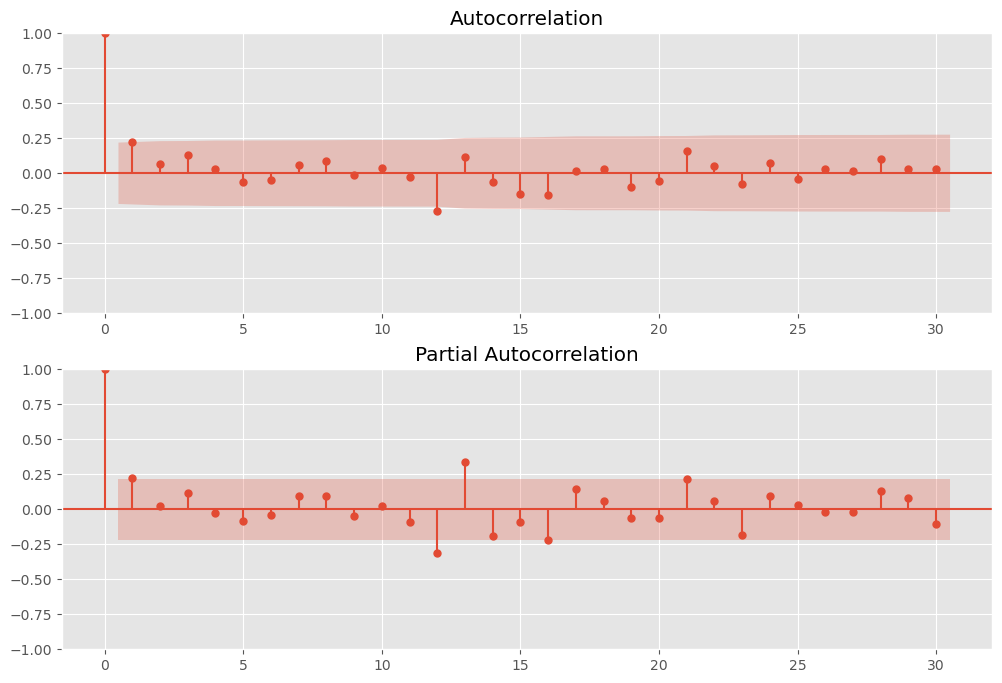

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['diff12'].dropna().iloc[13:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['diff12'].dropna().iloc[13:],lags=30,ax=ax2)

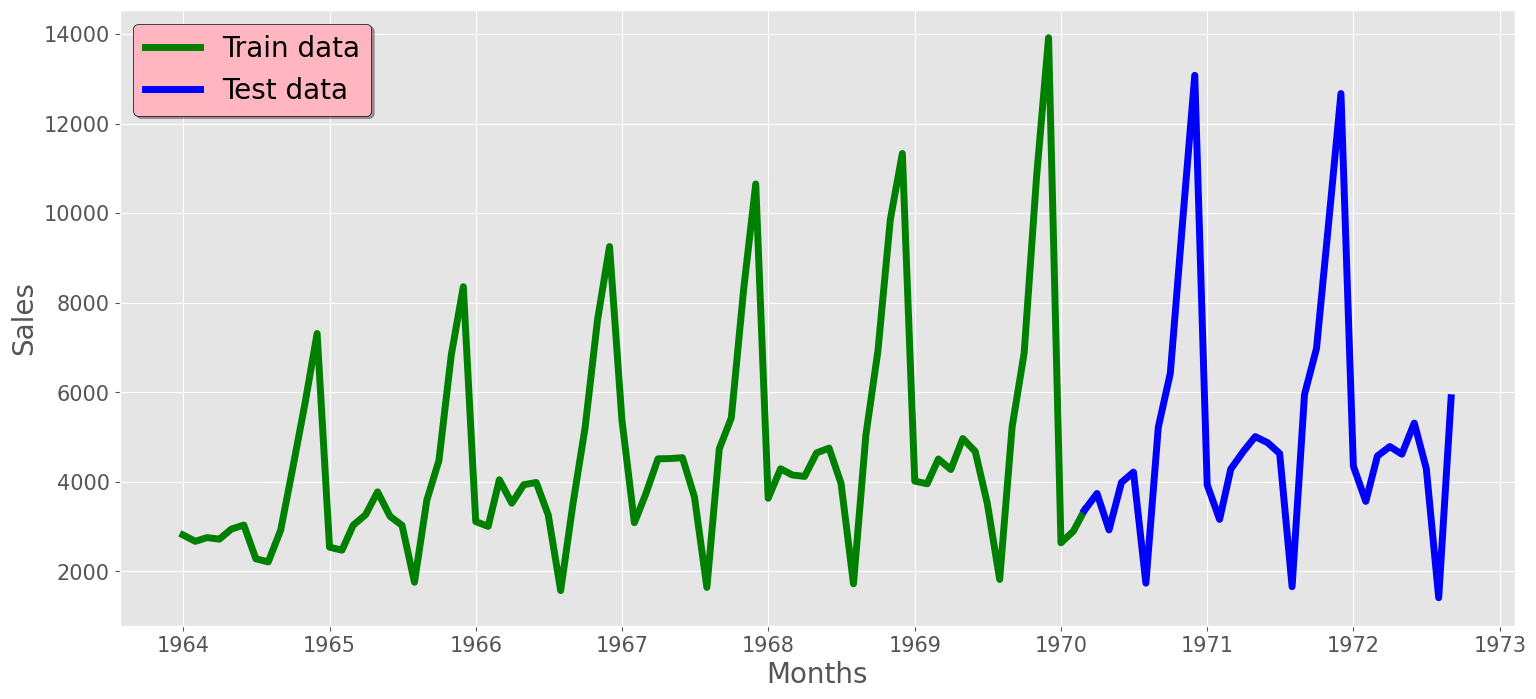

In [88]:
#split data into train and test data
train_data=data['Sales'].iloc[0:-30]
test_data=data['Sales'].iloc[-31:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Months',fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data, 'green', label='Train data', linewidth=5)
plt.plot(test_data, 'blue', label='Test data', linewidth=5)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')

In [89]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [90]:
model=ARIMA(data['Sales'],order=(1,1,1))
model_fit=model.fit()

In [91]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 15 Jan 2024   AIC                           1911.627
Time:                        11:50:43   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

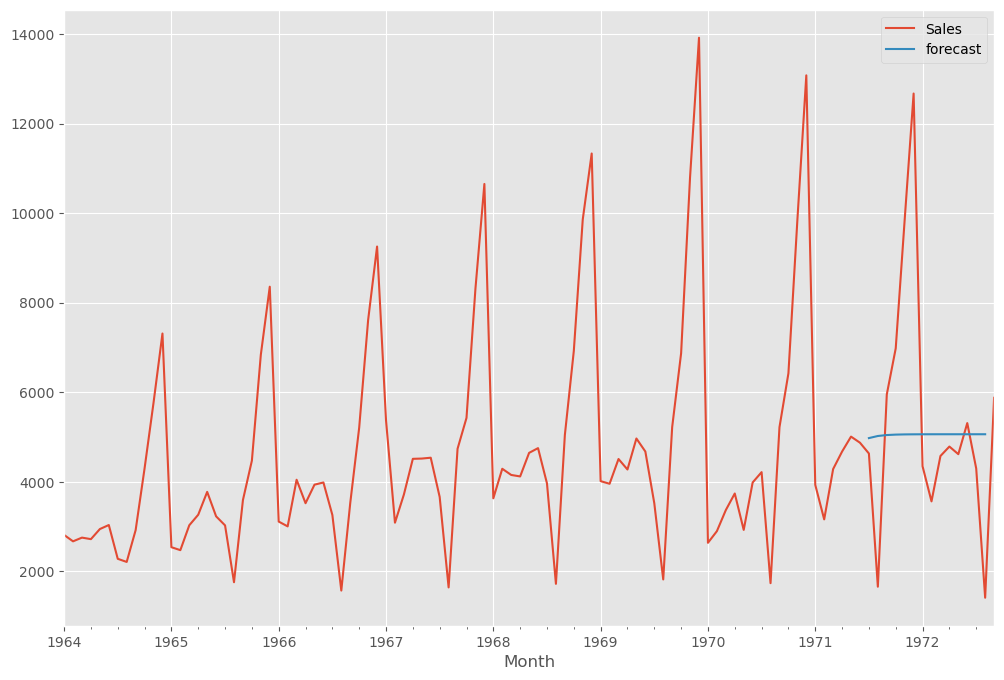

In [92]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))

In [99]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [100]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Mon, 15 Jan 2024   AIC                           1486.804
Time:                                    11:53:46   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

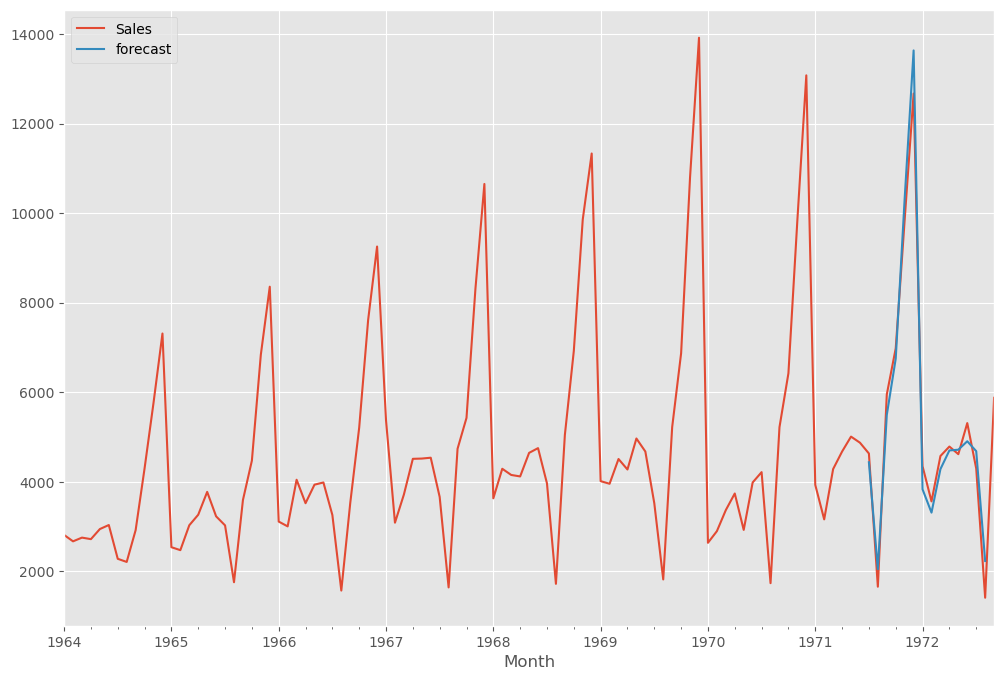

In [101]:
data['forecast']=results.predict(start=90,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))

In [104]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [105]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [106]:
future_datest_df.tail()

,Sales,diff1,diff12,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [107]:
future_df=pd.concat([data,future_datest_df])

<Axes: >

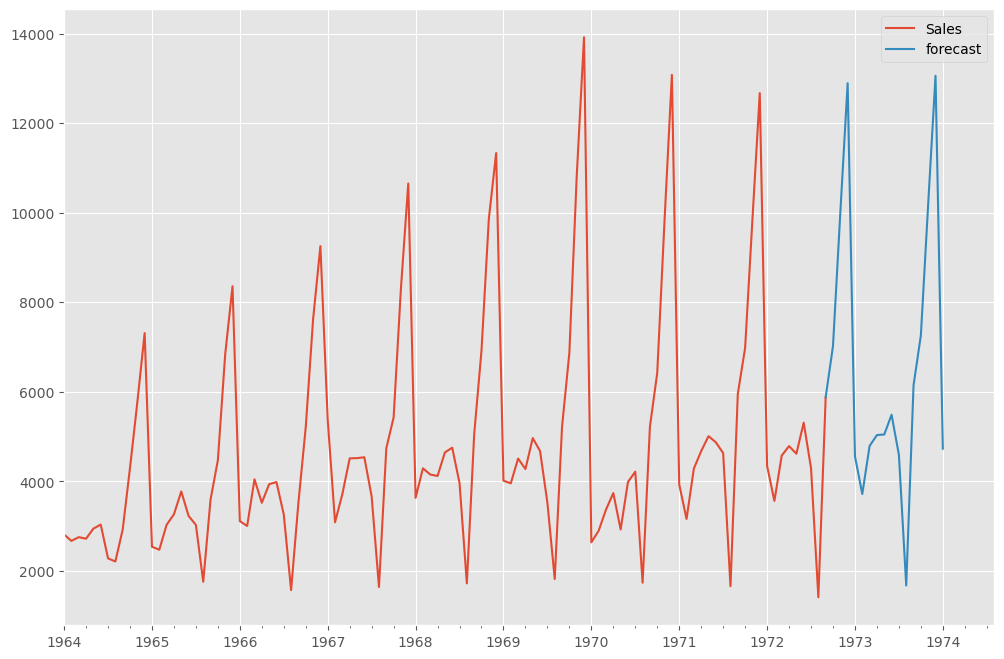

In [108]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 